In [14]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

np.set_printoptions(precision=2)

Why do I get weird behavior for the KL of the joint model ? Answer: because I had not normalized my formula properly.

In [2]:
results_dir = 'results'
file ='asyminter_asyminit_parameter_sweep_cause_k=10.pkl'
with open(os.path.join(results_dir, file), 'rb') as fin:
    results = pickle.load(fin)

In [3]:
for e in results:
    print(e['lr'])
    if e['lr']==3:
        break

0.3
1
3


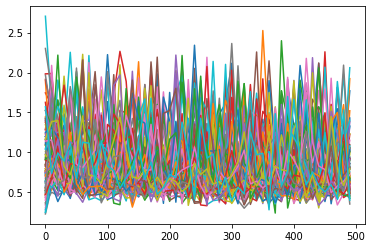

In [7]:
plt.plot(e['steps'], e['kl_joint'])
pass

Why does the geometric model seem super hard to optimize ? Investigate the property of this mean of logits.

In [34]:
from categorical.distances1 import sample_joint
from categorical.utils import entropy, kullback_leibler

In [38]:
k = 50
causal = sample_joint(k=k, n=100,concentration=1,symmetric=False)

In [45]:
geometric = causal.intervention(on='geometric')
weigthedgeo = causal.intervention(on='weightedgeo')

In [46]:
uniform = np.ones(k)/k
for marg in [
    causal.marginal,
    causal.reverse().marginal,
    geometric.reverse().marginal,
    weigthedgeo.reverse().marginal
]:
    hh = np.log(kullback_leibler(uniform, marg))
    print(hh.mean(),hh.std())


-0.6010632057413153 0.22008516877086062
-4.025055296606523 0.22322537331169312
-4.180745703087444 0.20902947104016767
-3.5433381186171533 0.21856088220772535


The effect marginal is closer from uniform, and the geometric intervention is even closer.
On contrary the weighted geometic intervention is less close from the uniform.
The difficulty of optimizing for geometric intervention might be due to this uniformity. Converging to the center of the simplex is more difficult than converging to one of the sides which is effectively lower dimensional. Except that the KL explodes in these situations. This may also explain why the expected KL is 0.5 after geometric intervention vs 1 after other interventions. 